In [1410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Problem Statement

- **Primary Goal**
 - **Cluster students on the basis of followings**:
     - Job profile
     - Company
     - Aspired roles
 - Recognizing **significant features** that will drive similar characteristics.
- **Long term benefits** : 
    - **Better Guideline for Business executives to target right student , more conversions**
    - **More market penetration**

In [1411]:
df = pd.read_csv("scaler_clustering.csv")

In [1412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [1413]:
df.shape

(205843, 7)

In [1414]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


#### Dropping Unnamed Column 

In [1415]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

#### Convert 'orgyear' and 'ctc_updated_year'  to integer

In [1416]:
#df['orgyear'] = df['orgyear'].astype(np.int64)
#df['ctc_updated_year'] = df['ctc_updated_year'].astype(np.int64)

#### Missing value detection

In [1417]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
job_position,job_position,25.534995
orgyear,orgyear,0.041779
company_hash,company_hash,0.021376
email_hash,email_hash,0.000000
ctc,ctc,0.000000
ctc_updated_year,ctc_updated_year,0.000000


#### Statistical summary

In [1418]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [1419]:
df.describe(include=object)

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


### Exploratory Data Analysis

#### Univariate Analysis

In [1420]:
df["job_position"].value_counts()

Backend Engineer                  43554
FullStack Engineer                24717
Other                             18071
Frontend Engineer                 10417
Engineering Leadership             6870
                                  ...  
ayS                                   1
Principal Product Engineer            1
Senior Director of Engineering        1
Seller Support Associate              1
Android Application developer         1
Name: job_position, Length: 1017, dtype: int64

In [1421]:
df["company_hash"].value_counts()

nvnv wgzohrnvzwj otqcxwto         8337
xzegojo                           5381
vbvkgz                            3481
zgn vuurxwvmrt vwwghzn            3411
wgszxkvzn                         3240
                                  ... 
onvqmhwpo                            1
bvsxw ogenfvqt uqxcvnt rxbxnta       1
agsbv ojontbo                        1
vnnhzt xzegwgb                       1
bvptbjnqxu td vbvkgz                 1
Name: company_hash, Length: 37299, dtype: int64

In [1422]:
df["orgyear"].value_counts()

2018.0    25256
2019.0    23427
2017.0    23239
2016.0    23043
2015.0    20610
          ...  
2107.0        1
1972.0        1
2101.0        1
208.0         1
200.0         1
Name: orgyear, Length: 77, dtype: int64

In [1423]:
df["ctc_updated_year"].value_counts()

2019.0    68688
2021.0    64976
2020.0    49444
2017.0     7561
2018.0     6746
2016.0     5501
2015.0     2927
Name: ctc_updated_year, dtype: int64

### Filtering features by data type

#### Numerical features

In [1424]:
continious_features = df.select_dtypes(include=['int64','float64']).columns
continious_features

Index(['orgyear', 'ctc', 'ctc_updated_year'], dtype='object')

#### Categorical features

In [1425]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['company_hash', 'email_hash', 'job_position'], dtype='object')

### Outlier Treatment

In [1426]:
df_numeric = df[continious_features]
df_numeric.head()

,orgyear,ctc,ctc_updated_year
0,2016.0,1100000,2020.0
1,2018.0,449999,2019.0
2,2015.0,2000000,2020.0
3,2017.0,700000,2019.0
4,2017.0,1400000,2019.0


In [1427]:
def find_outliers_IQR(column_name):
    print("Outliers by feature name --> ",column_name)
    Q1=df[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)

    IQR=Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = df[((df[column_name]<lower) & (df[column_name]>upper))]

    return outliers

In [1428]:
outlier_df_by_orgyear = find_outliers_IQR("orgyear")
df.drop(outlier_df_by_orgyear.index,inplace = True)

Outliers by feature name -->  orgyear


In [1429]:
outlier_df_by_orgyear = find_outliers_IQR("orgyear")
outlier_df_by_orgyear

Outliers by feature name -->  orgyear


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


In [1430]:
outlier_df_by_ctc = find_outliers_IQR("ctc")
outlier_df_by_ctc

Outliers by feature name -->  ctc


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


In [1431]:
df.drop(outlier_df_by_ctc.index,inplace = True)

In [1432]:
outlier_df_by_ctc = find_outliers_IQR("ctc")
outlier_df_by_ctc

Outliers by feature name -->  ctc


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


In [1433]:
outlier_df_by_ctc_updated_year = find_outliers_IQR("ctc_updated_year")
outlier_df_by_ctc_updated_year

Outliers by feature name -->  ctc_updated_year


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


### Data Pre-processing

In [1434]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
job_position,job_position,25.534995
orgyear,orgyear,0.041779
company_hash,company_hash,0.021376
email_hash,email_hash,0.000000
ctc,ctc,0.000000
ctc_updated_year,ctc_updated_year,0.000000


In [1435]:
df['job_position'].replace(np.nan, "UNKNOWN",inplace=True)
df['company_hash'].replace(np.nan, "UNKNOWN",inplace=True)

#### KNN Imputation of  feature 'orgyear' (Numerical feature)

In [1436]:
#### Numerical missing value treatment - KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values = np.nan, n_neighbors=7)
df["orgyear"] = pd.DataFrame(imputer.fit_transform(df[["orgyear"]]))

In [1437]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
company_hash,company_hash,0.0
email_hash,email_hash,0.0
orgyear,orgyear,0.0
ctc,ctc,0.0
job_position,job_position,0.0
ctc_updated_year,ctc_updated_year,0.0


#### Setting missing categorical feature values to level "UNKNOWN"

In [1438]:
df['company_hash'].replace(np.nan, "UNKNOWN",inplace=True)
df['job_position'].replace(np.nan, "UNKNOWN",inplace=True)

In [1439]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
company_hash,company_hash,0.0
email_hash,email_hash,0.0
orgyear,orgyear,0.0
ctc,ctc,0.0
job_position,job_position,0.0
ctc_updated_year,ctc_updated_year,0.0


#### Regex for cleaning company names

In [1440]:
# Function to Remove special characters from company_hash by using Regex
import re
def remove_special_characters_company_names(company_name):
    # Search for opening bracket in the name followed by
    # any characters repeated any number of times
    if re.search('[^A-Za-z0-9 ]+', company_name):
        # return the cleaned name    
        return re.sub('[^A-Za-z0-9 ]+', '', company_name)
  
    else:
        # if clean up needed return the same name
        return company_name       

In [1441]:
# Updated the company names 
df['company_hash'] = df['company_hash'].apply(remove_special_characters_company_names)

In [1442]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
company_hash,company_hash,0.0
email_hash,email_hash,0.0
orgyear,orgyear,0.0
ctc,ctc,0.0
job_position,job_position,0.0
ctc_updated_year,ctc_updated_year,0.0


#### Processing 'job_position' based on frequency of data points  

In [1443]:
# Before processing unique job positions 
df['job_position'].nunique()

1018

In [1444]:
df['job_position'] = df['job_position'].str.lower()
job_position_counts = df['job_position'].value_counts()
job_position_counts[job_position_counts > 1] # only considering job positions having frequency more than equal 2
df = df[df['job_position'].isin(job_position_counts[job_position_counts > 1].index)]

In [1445]:
# After processing unique job positions 
df['job_position'].nunique()

242

#### Processing 'company_hash' based on frequency of data points  

In [1446]:
# Before processing unique company_hash 
df['company_hash'].nunique()

37220

In [1447]:
df['company_hash'] = df['company_hash'].str.lower()
company_hash_counts = df['company_hash'].value_counts()
company_hash_counts[company_hash_counts > 1] # only considering company_hash having frequency more than equal 2
df = df[df['company_hash'].isin(company_hash_counts[company_hash_counts > 1].index)]

In [1448]:
df['company_hash'].nunique()

13763

#### Removing Email as it can be condidered to be indentity feature 

In [1449]:
#df.drop(columns=["company_hash","email_hash"],inplace=True)
df.drop(columns=["email_hash"],inplace=True)

#### Checking for duplicates in the dataset and drop them

In [1450]:
duplicate = df[df.duplicated()]
duplicate.shape

(17580, 5)

In [1451]:
df.drop_duplicates(keep=False, inplace=True)

In [1452]:
duplicate = df[df.duplicated()]
duplicate

,company_hash,orgyear,ctc,job_position,ctc_updated_year


#### Creating feature ‘Years of Experience’ column by subtracting 'orgyear' from 'current year'

In [1453]:
import datetime
current_year = datetime.datetime.now().year #get current year
df["years_of_experience"] = current_year - df['orgyear']  # substract to get the year delta

#### Encoding

In [1454]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['company_hash', 'job_position'], dtype='object')

**Lebel encoding is not the best option here** howver there is no other best optins availble as there are 
Mutiple sub lebels available hence OneHot encoding won't be appropriate as it will introduce more dimentions and sparcity 
which won't be good for clustering algoritms 
Hence sticking to Label Encoding(although it will introduce ordinality in the data)
**Restricting Label Encoding to only job_position** as we need numerical data for clustering 

In [1455]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

df['job_position_new'] = le.fit_transform(df['job_position'])
df['job_position_new']

0         103
1          68
3          33
4          68
5          68
         ... 
205838    239
205839    239
205840    239
205841    239
205842    239
Name: job_position_new, Length: 155682, dtype: int32

#### Changing data type

In [1456]:
# Converting feature's data type from float to integer 
df['job_position_new'] = df['job_position_new'].astype(np.int32)
df['orgyear'] = df['orgyear'].astype(np.int32)
df['ctc_updated_year'] = df['ctc_updated_year'].astype(np.int32)
df['years_of_experience'] = df['years_of_experience'].astype(np.int32)

In [1457]:
def exp_correction(x):
    if x < 0:
        return 0
    else:
        return x
df['years_of_experience'] = df['years_of_experience'].apply(exp_correction)

### Manual Clustering

In [1458]:
df = df[["company_hash","job_position","orgyear","ctc","job_position_new","ctc_updated_year","years_of_experience"]]

In [1459]:
def convert_to_designation(row):
    ctc_percentile_25,ctc_percentile_50,ctc_percentile_75,ctc = (row["25%"],row["50%"],row["75%"],row["ctc"])  
    if ctc > ctc_percentile_75:
        return 3
    elif ctc > ctc_percentile_50:
        return 2
    else:
        return 1

In [1460]:
df.shape

(155682, 7)

- **Manual Clustering** on the **basis of** learner’s **company, job position and years of experience**

In [1461]:
df_grp_exp_pos_company = df.groupby(["years_of_experience","job_position","company_hash"])["ctc"].describe().reset_index()
df_grp_exp_pos_company = df_grp_exp_pos_company[["years_of_experience","job_position","company_hash","mean","25%","50%","75%"]]
df = df.merge(df_grp_exp_pos_company,on=["years_of_experience","job_position","company_hash"], how="inner")
df["designation"] = df.apply(convert_to_designation,axis=1) 

In [1462]:
df = df[["company_hash","job_position","orgyear","ctc","job_position_new","ctc_updated_year","years_of_experience","designation"]]

In [1463]:
df.head()

,company_hash,job_position,orgyear,ctc,job_position_new,ctc_updated_year,years_of_experience,designation
0,atrgxnnt xzaxv,other,2016,1100000,103,2020,7,1
1,qtrxvzwt xzegwgbb rxbxnta,fullstack engineer,2018,449999,68,2019,5,1
2,qtrxvzwt xzegwgbb rxbxnta,fullstack engineer,2018,620000,68,2020,5,1
3,qtrxvzwt xzegwgbb rxbxnta,fullstack engineer,2018,950000,68,2021,5,3
4,qtrxvzwt xzegwgbb rxbxnta,fullstack engineer,2018,750000,68,2020,5,1


In [1464]:
df.shape

(155682, 8)

- **Analysis at Company & Job Position level. Name that flag Class with values [1,2,3]**

In [1465]:
df_grp_pos_company = df.groupby(["job_position","company_hash"])["ctc"].describe().reset_index()
df_grp_pos_company = df_grp_pos_company[["job_position","company_hash","mean","25%","50%","75%"]]
df = df.merge(df_grp_pos_company,on=["job_position","company_hash"], how="inner")
df["class"] = df.apply(convert_to_designation,axis=1) 

In [1466]:
df = df[["company_hash","job_position","orgyear","ctc","job_position_new","ctc_updated_year","years_of_experience","designation","class"]]

In [1467]:
df.head()

,company_hash,job_position,orgyear,ctc,job_position_new,ctc_updated_year,years_of_experience,designation,class
0,atrgxnnt xzaxv,other,2016,1100000,103,2020,7,1,3
1,atrgxnnt xzaxv,other,2014,1070000,103,2018,9,1,1
2,qtrxvzwt xzegwgbb rxbxnta,fullstack engineer,2018,449999,68,2019,5,1,1
3,qtrxvzwt xzegwgbb rxbxnta,fullstack engineer,2018,620000,68,2020,5,1,1
4,qtrxvzwt xzegwgbb rxbxnta,fullstack engineer,2018,950000,68,2021,5,3,2


- **Analysis at the Company level. Name that flag Tier with values [1,2,3]**

In [1468]:
df_grp_company = df.groupby(["company_hash"])["ctc"].describe().reset_index()
df_grp_company = df_grp_company[["company_hash","mean","25%","50%","75%"]]
df = df.merge(df_grp_company,on=["company_hash"], how="inner")
df["Tier"] = df.apply(convert_to_designation,axis=1) 

In [1469]:
df = df[["company_hash","job_position","orgyear","ctc","job_position_new","ctc_updated_year","years_of_experience","designation","class","Tier"]]

In [1470]:
df.head()

,company_hash,job_position,orgyear,ctc,job_position_new,ctc_updated_year,years_of_experience,designation,class,Tier
0,atrgxnnt xzaxv,other,2016,1100000,103,2020,7,1,3,2
1,atrgxnnt xzaxv,other,2014,1070000,103,2018,9,1,1,1
2,atrgxnnt xzaxv,backend engineer,2019,500000,33,2020,4,1,1,1
3,atrgxnnt xzaxv,backend engineer,2014,1000000,33,2018,9,1,3,1
4,atrgxnnt xzaxv,data scientist,2017,1700000,46,2020,6,1,1,3


- **Manual clustering based on ctc_updated_year**
 - Like ctc manual clustering can be performed based on ctc_updated_year ,based on recency of update or frequency count of year 

### Insights Manual Clustering

- **Top 10 employees** (**earning** more than most of the employees in the company) - **Tier 1**

In [1471]:
df_tier_1 = df[df["Tier"] ==1][["company_hash","job_position","ctc","Tier"]]
df_tier_1 = df_tier_1.sort_values(by="ctc",ascending=False)
df_tier_1.head(10)

,company_hash,job_position,ctc,Tier
147980,agyv tdnqvwg,other,200000000,1
134966,ltnvxqfvjo,unknown,200000000,1
134965,ltnvxqfvjo,data analyst,200000000,1
147981,agyv tdnqvwg,unknown,200000000,1
149530,wvquvzntq,unknown,200000000,1
101225,ztnwrgha ojontbo uqxcvnt rxbxnta,data analyst,200000000,1
149531,wvquvzntq,sdet,200000000,1
101226,ztnwrgha ojontbo uqxcvnt rxbxnta,android engineer,200000000,1
129108,oyqttzxfvo ntwyzgwqtvoj,support engineer,199900000,1
129109,oyqttzxfvo ntwyzgwqtvoj,unknown,199900000,1


-  **Top 10 employees** of data science in Amazon / TCS etc **earning more than their peers - Class 1**


In [1472]:
df_class_1 = df[df["class"] ==1][["company_hash","job_position","ctc","class"]]
df_class_1 = df_class_1.sort_values(by="ctc",ascending=False)
df_class_1.head(10)

,company_hash,job_position,ctc,class
96359,egdwgzz,engineering leadership,200000000,1
131271,cxcg,android engineer,200000000,1
98610,qvzaonva,support engineer,200000000,1
113247,xqgz bghznvxz,other,200000000,1
149530,wvquvzntq,unknown,200000000,1
83591,eqttwyvqst,security leadership,200000000,1
149531,wvquvzntq,sdet,200000000,1
122274,nvnv ntrtotqcxwto rna,other,200000000,1
83826,mgzxng atoxszo,other,200000000,1
134966,ltnvxqfvjo,unknown,200000000,1


- **Bottom 10 employees** of data science in Amazon / TCS etc **earning less than their peers - Class 3**

In [1473]:
df_class_3 = df[df["class"] ==3][["company_hash","job_position","ctc","class"]]
df_class_3 = df_class_3.sort_values(by="ctc",ascending=False)
df_class_3.tail(10)

,company_hash,job_position,ctc,class
147777,xmtd,unknown,20000,3
143879,xz rgwg,backend engineer,16000,3
141878,vzjwgzztwn,ios engineer,15000,3
141810,mlxn,backend engineer,15000,3
110981,rs trtwnqgzxwo,android engineer,14000,3
134585,hzxctqoxnj ge xrrxzgxo vn wyxwvsg,backend engineer,12000,3
125832,exznqhon ogrhnxgzo ucn rna,data scientist,10000,3
152806,gutzoggi,ios engineer,9500,3
128462,uqtu ntwyzgrgsxto,fullstack engineer,2400,3
155290,xm,unknown,16,3


-  **Bottom 10 employees** (earning less than most of the employees in the company)- **Tier 3**

In [1474]:
df_tier_3 = df[df["Tier"] ==3][["company_hash","job_position","ctc","Tier"]]
df_tier_3 = df_tier_3.sort_values(by="ctc",ascending=False)
df_tier_1.tail(10)

,company_hash,job_position,ctc,Tier
98858,vsgav,fullstack engineer,1000,1
85802,sggsrt,co-founder,1000,1
27924,nvnv wgzohrnvzwj otqcxwto,backend engineer,600,1
55276,gjg,fullstack engineer,600,1
88165,zvz,unknown,600,1
138193,hzxctqoxnj ge fvoyxzsngz,unknown,200,1
155291,xm,unknown,15,1
83414,xzntqcxtfmxn,unknown,14,1
83415,xzntqcxtfmxn,unknown,6,1
83398,xzntqcxtfmxn,backend engineer,2,1


-  **Top 10 employees** in Amazon- X department - **having 5/6/7 years of experience** earning more than their peers - **Tier X**

In [1475]:
#df_tier_x = df[df["Tier"] =='x' & df["years_of_experience"] in (5,6,7)][["company_hash","email_hash","job_position","ctc","Tier"]]
#df_tier_X = df_tier_x.sort_values(by="ctc",ascending=False)
#df_tier_x.head(10)

-  **Top 10 companies (based on their CTC)**

In [1476]:
df_top_ctc= df.sort_values(by="ctc",ascending=False)
df_top_ctc[["company_hash","ctc"]].head(10)

,company_hash,ctc
130248,obvqnuqxdwgb,255555555
87440,zvz,200000000
27505,nvnv wgzohrnvzwj otqcxwto,200000000
29809,nvnv wgzohrnvzwj otqcxwto,200000000
39853,vwwtznhqt,200000000
11943,ntwy bvyxzaqv,200000000
56685,mqxonrtwgzt v bvyxzaqv sqghu wgbuvzj,200000000
14803,fxuqg rxbxnta,200000000
16880,vbvkgz,200000000
39818,vwwtznhqt,200000000


- **Top 2 positions in every company (based on their CTC)**

In [1477]:
df2=df.groupby(['company_hash']).apply(lambda x: x.sort_values(['ctc'], ascending=False).head(2))
df2

company_hash  \
company_hash                                                            
0                              89358                                0   
                               89359                                0   
01 ojztqsj                     140334                      01 ojztqsj   
                               140335                      01 ojztqsj   
05mz exzytvrny uqxcvnt rxbxnta 148889  05mz exzytvrny uqxcvnt rxbxnta   
...                                                               ...   
zyco xzaxv                     125943                      zyco xzaxv   
zz                             97005                               zz   
                               97006                               zz   
zzb ztdnstz vacxogqj ucn rna   144472    zzb ztdnstz vacxogqj ucn rna   
                               144473    zzb ztdnstz vacxogqj ucn rna   

                                             job_position  orgyear      ctc  \
company_hash                                                                  
0                              89358              unknown     2020   100000   
                               89359                other     2020   100000   
01 ojztqsj                     140334   frontend engineer     2011   830000   
                               140335    android engineer     2016   270000   
05mz exzytvrny uqxcvnt rxbxnta 148889             unknown     2019  1100000   
...                                                   ...      ...      ...   
zyco xzaxv                     125943             unknown     2013   600000   
zz                             97005                other     2013  1370000   
                               97006              unknown     2009   500000   
zzb ztdnstz vacxogqj ucn rna   144472  fullstack engineer     2017   600000   
                               144473             unknown     2017   600000   

                                       job_position_new  ctc_updated_year  \
company_hash                                                                
0                              89358                239              2020   
                               89359                103              2020   
01 ojztqsj                     140334                65              2019   
                               140335                 3              2019   
05mz exzytvrny uqxcvnt rxbxnta 148889               239              2021   
...                                                 ...               ...   
zyco xzaxv                     125943               239              2021   
zz                             97005                103              2020   
                               97006                239              2021   
zzb ztdnstz vacxogqj ucn rna   144472                68              2021   
                               144473               239              2021   

                                       years_of_experience  designation  \
company_hash                                                              
0                              89358                     3            1   
                               89359                     3            1   
01 ojztqsj                     140334                   12            1   
                               140335                    7            1   
05mz exzytvrny uqxcvnt rxbxnta 148889                    4            1   
...                                                    ...          ...   
zyco xzaxv                     125943                   10            1   
zz                             97005                    10            1   
                               97006                    14            1   
zzb ztdnstz vacxogqj ucn rna   144472                    6            1   
                               144473                    6            1   

                                       class  Tier  
company_hash                                    

In [1478]:
df3 = df.groupby('company_hash')['ctc'].nlargest(2)
df3

company_hash                          
0                               89358      100000
                                89359      100000
01 ojztqsj                      140334     830000
                                140335     270000
05mz exzytvrny uqxcvnt rxbxnta  148889    1100000
                                           ...   
zyco xzaxv                      125943     600000
zz                              97005     1370000
                                97006      500000
zzb ztdnstz vacxogqj ucn rna    144472     600000
                                144473     600000
Name: ctc, Length: 27385, dtype: int64

#### Designation Flag & Insights

In [1479]:
df["designation"].value_counts(normalize=True)*100

1    74.518570
3    17.775337
2     7.706093
Name: designation, dtype: float64

#### Class Flag & Insights

In [1480]:
df["class"].value_counts(normalize=True)*100

1    62.634730
3    22.276821
2    15.088450
Name: class, dtype: float64

#### Tier Flag & Insights

In [1481]:
df["Tier"].value_counts(normalize=True)*100

1    56.320577
3    23.116353
2    20.563071
Name: Tier, dtype: float64

#### Insights based on EDA

In [1482]:
df_selected = df[["company_hash","orgyear","ctc","job_position_new","ctc_updated_year","years_of_experience","designation","class","Tier"]]

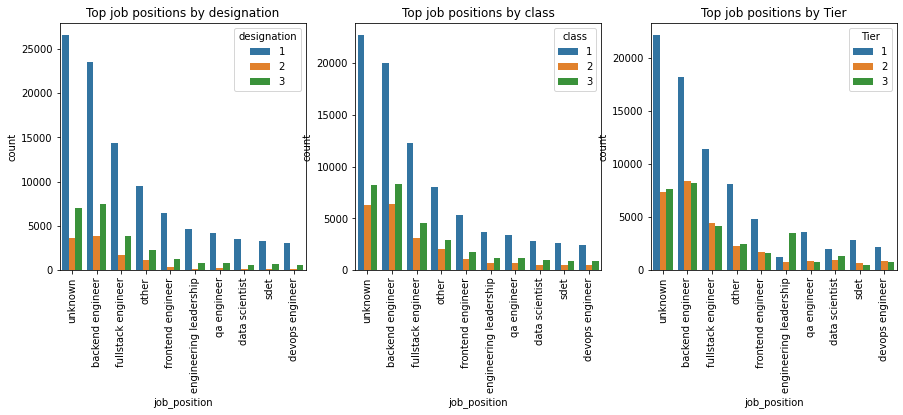

In [1483]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)   # Define 2 rows, 3 column, Activate subplot 1. 
sp = sns.countplot(x="job_position",data=df,hue="designation",order=df.job_position.value_counts().iloc[:10].index)
sp.set(title='Top job positions by designation')
plt.xticks(rotation=90)
plt.subplot(2, 3, 2)   # Define 2 rows, 3 column, Activate subplot 2. 
sp = sns.countplot(x="job_position",data=df,hue="class",order=df.job_position.value_counts().iloc[:10].index)
sp.set(title='Top job positions by class')
plt.xticks(rotation=90)
plt.subplot(2, 3, 3)   # Define 2 rows, 3 column, Activate subplot 3. 
sp = sns.countplot(x="job_position",data=df,hue="Tier",order=df.job_position.value_counts().iloc[:10].index)
sp.set(title='Top job positions by Tier')
plt.xticks(rotation=90)
plt.show()

- **Insights**
  - **Backend and Fullstack Engineers** have got top CTC across job positions
    - It's consistent across designation, class and Tier flags

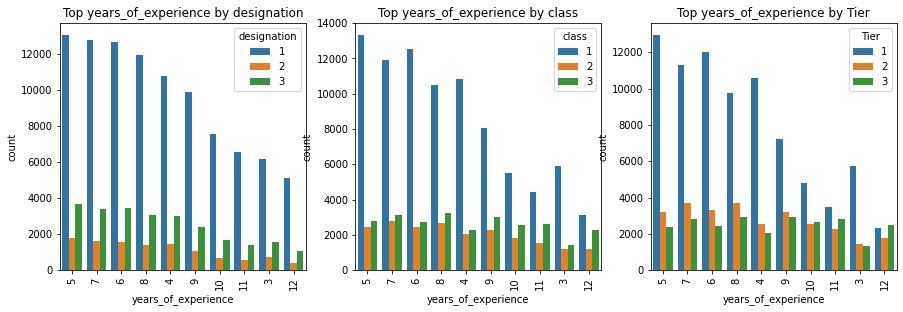

In [1484]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)   # Define 2 rows, 3 column, Activate subplot 1. 
sp = sns.countplot(x="years_of_experience",data=df,hue="designation",order=df.years_of_experience.value_counts().iloc[:10].index)
sp.set(title='Top years_of_experience by designation')
plt.xticks(rotation=90)
plt.subplot(2, 3, 2)   # Define 2 rows, 3 column, Activate subplot 2. 
sp = sns.countplot(x="years_of_experience",data=df,hue="class",order=df.years_of_experience.value_counts().iloc[:10].index)
sp.set(title='Top years_of_experience by class')
plt.xticks(rotation=90)
plt.subplot(2, 3, 3)   # Define 2 rows, 3 column, Activate subplot 3. 
sp = sns.countplot(x="years_of_experience",data=df,hue="Tier",order=df.years_of_experience.value_counts().iloc[:10].index)
sp.set(title='Top years_of_experience by Tier')
plt.xticks(rotation=90)
plt.show()

- **Insights**
  - **4-9 years experience professionals** shares top CTC 
    - It's consistent across designation, class and Tier flags

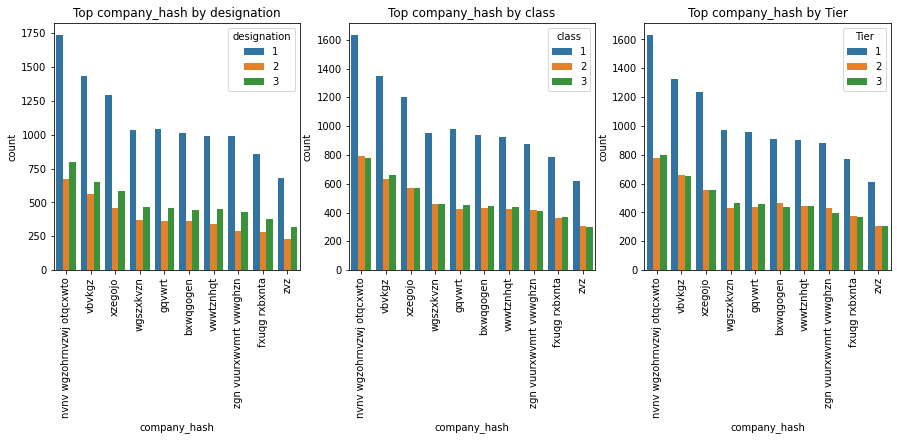

In [1485]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)   # Define 2 rows, 3 column, Activate subplot 1. 
sp = sns.countplot(x="company_hash",data=df,hue="designation",order=df.company_hash.value_counts().iloc[:10].index)
sp.set(title='Top company_hash by designation')
plt.xticks(rotation=90)
plt.subplot(2, 3, 2)   # Define 2 rows, 3 column, Activate subplot 2. 
sp = sns.countplot(x="company_hash",data=df,hue="class",order=df.company_hash.value_counts().iloc[:10].index)
sp.set(title='Top company_hash by class')
plt.xticks(rotation=90)
plt.subplot(2, 3, 3)   # Define 2 rows, 3 column, Activate subplot 3. 
sp = sns.countplot(x="company_hash",data=df,hue="Tier",order=df.company_hash.value_counts().iloc[:10].index)
sp.set(title='Top company_hash by Tier')
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2019'),
  Text(1, 0, '2021'),
  Text(2, 0, '2020'),
  Text(3, 0, '2017'),
  Text(4, 0, '2018'),
  Text(5, 0, '2016'),
  Text(6, 0, '2015')])

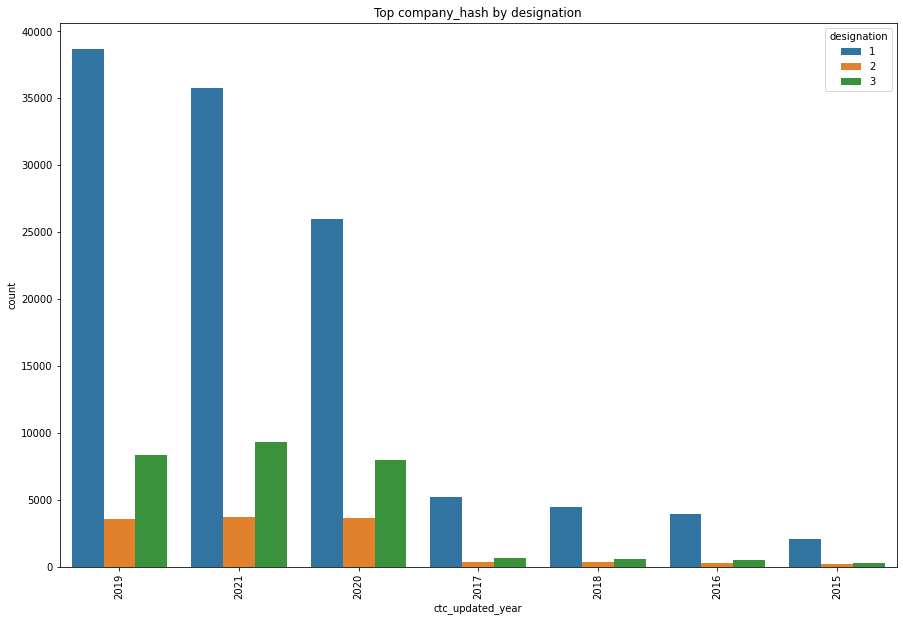

In [1508]:
plt.figure(figsize=(15, 10))
sp = sns.countplot(x="ctc_updated_year",data=df,hue="designation",order=df.ctc_updated_year.value_counts().iloc[:10].index)
sp.set(title='Top company_hash by designation')
plt.xticks(rotation=90)

- **Insights**
  - **In years 2021,2019,2020 most CTC updates took place** 
  - Highest CTC offered (i.e.More than 75th percentile) in year 2021

### Data processing for Unsupervised clustering - Standardization of data

In [1486]:
#df_selected = df[["orgyear","ctc","ctc_updated_year","years_of_experience","designation","class","Tier"]]
df_selected = df[["orgyear","ctc","job_position_new","ctc_updated_year","years_of_experience","designation","class","Tier"]]

In [1487]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_selected)
X=scaler.transform(df_selected)

### Unsupervised learning

- K-means clustering

In [1488]:
from sklearn.cluster import KMeans

k = 8
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

#### Checking clustering tendency, Elbow method & K- means clustering

In [1489]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

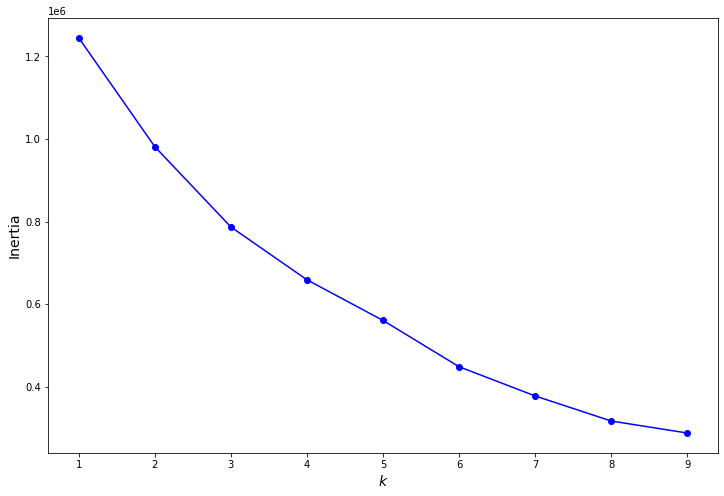

In [1490]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

#### Hierarchical Clustering

In [1491]:
scaled_df = pd.DataFrame(X, columns=df_selected.columns, index=df_selected.index)

In [1492]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155682 entries, 0 to 155681
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   orgyear              155682 non-null  float64
 1   ctc                  155682 non-null  float64
 2   job_position_new     155682 non-null  float64
 3   ctc_updated_year     155682 non-null  float64
 4   years_of_experience  155682 non-null  float64
 5   designation          155682 non-null  float64
 6   class                155682 non-null  float64
 7   Tier                 155682 non-null  float64
dtypes: float64(8)
memory usage: 10.7 MB


In [1493]:
small_df = df.sample(frac=0.04) # Hierarchical clustering (doing on a sample of the dataset as process is taking time)

In [1499]:
#df_selected = small_df[["orgyear","ctc","job_position_new","ctc_updated_year","years_of_experience","designation","class","Tier"]]
df_selected = small_df[["orgyear","ctc","ctc_updated_year","years_of_experience","designation","class","Tier"]]

In [1500]:
df_selected.shape

(6227, 7)

In [1501]:
df_selected.head()

,orgyear,ctc,ctc_updated_year,years_of_experience,designation,class,Tier
78591,2012,1550000,2017,11,1,2,2
67910,2016,1200000,2020,7,1,1,1
153317,2018,1200000,2021,5,1,1,1
135709,2015,1700000,2021,8,1,2,2
74595,2019,2400000,2019,4,3,3,3


In [1502]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(df_selected, method='ward') #linkage = ward

Text(0, 0.5, 'distance')

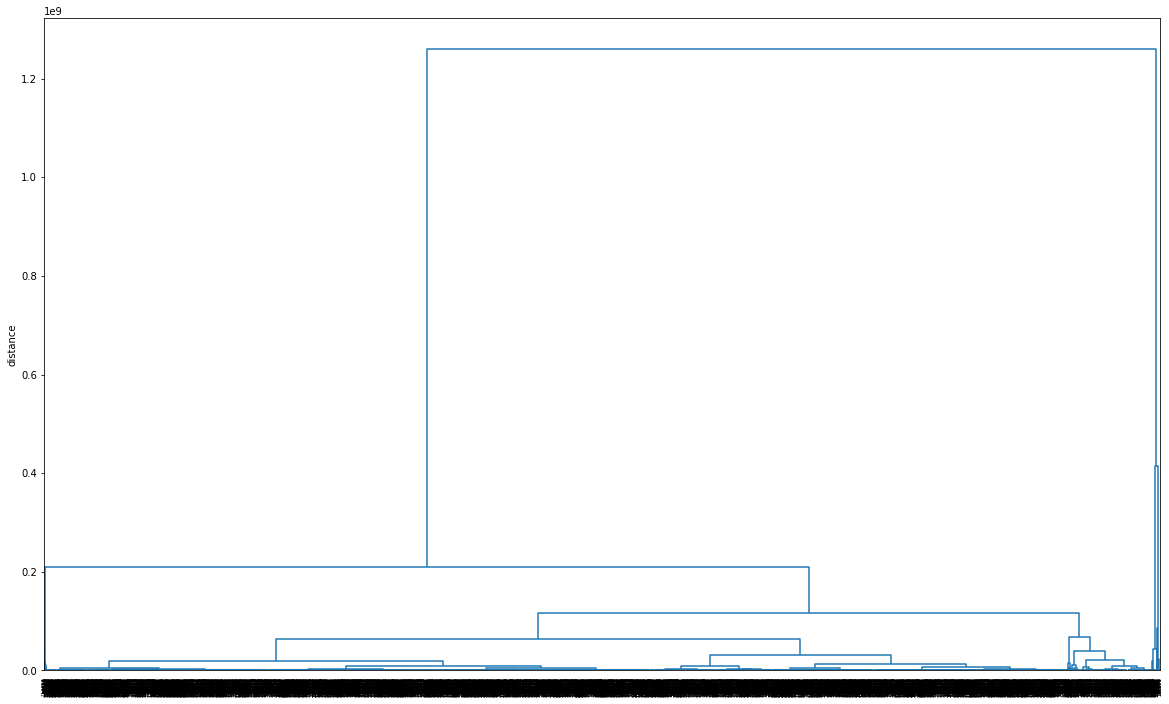

In [1504]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=df_selected.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

### Actionable Insights from Unsupervised Clustering


- Following **features significantly drives CTC hikes**   
    - Specific **Job profiles such as "Backend Engineer" , "FullStack Engineer" etc.**
    - **Experience range from 4-10 years** 
    - **Specific companies**  
        - nvnv wgzohrnvzwj otqcxwto
        - vbvkgz                          
        - xzegojo
        - wgszxkvzn
        - gqvwrt
- **In year 2021,2019,2020 most CTC updates took place**
    - Highest CTC offered (i.e.More than 75th percentile) in year 2021
- **Students** of Designation 1 **(i.e. lesser experience range) are being placed more often (~74%)** than that of remaining designations
    - Designation level 3 contributes to ~17 % 
- **62% Students were placed from Class 1 Companies** whilst **15% from class 3** (i.e. wrt Higher companies , job profile and higher CTC range) companies
- **56% Students were placed from Tier1 Companies** whilst **20% from Tier3** (i.e. companies with Higher CTC range) companies  

### Recommendations

- **Recommendations**
Key considerations:
Below recommendation will be more effective when more appropriate measures taken care wrt. data cleaning (e.g. company , job profile etc.) and feature engineering are taken care as well
- **Actionable items for business**
    - **Sales team must target more following category** of students to increase the chances of convertion i.e  admission at Scaler
        - **Lesser Experience range**
        - Tier 1 companies 
        - Experience range 4-6 years as well
        - **Backend /Full Stack engineers** - As there is great success stories around that 
        - **Lower Income group of Students** can be targeted **for higher CTC conversion**  
    - Scaler can approach more employers from similar organizations where there is high success stories
        - **Mass connect at colleage level** - No Advertisement needed for such students, **saving marketing costs**
        - **Discount can be offered** for students with **different job profiles which has relatively less success rates**  
        - HR of those companies can be approched where is previous scaler professional already working
            - Fresh bulk hires would be cost save for the organizations
            - Replacement hires can be explored as well 
    - Scaler can **tie up with more corporate offices for trained professional and provide long-term commitment** 